### *NeuralNet_Practice*

In [4]:
#July 2nd, 2023
#Goal:
#Understand Vectorization, activation functions

#Natural Language is how we, humans, exchange ideas and opinions. There are two main mediums for natural language – speech and text. 
#Listening and reading are effortless for a healthy human, but they’re difficult for a machine learning algorithm. That’s why scientists had to come up with Natural Language Processing (NLP).
#What is Natural Language Processing?
#NLP enables computers to process human language and understand meaning and context, along with the associated sentiment and intent behind it, and eventually, use these insights to create something new.
#NLP combines computational linguistics with statistical Machine Learning and Deep Learning models.

# Vectorization is jargon for a classic approach of converting input data from its raw format (i.e. text ) into vectors of real numbers which is the format that ML models support. This approach has been there ever since computers were first built, it has worked wonderfully across various domains, and it’s now used in NLP.
# In Machine Learning, vectorization is a step in feature extraction. The idea is to get some distinct features out of the text for the model to train on, by converting text to numerical vectors.

#https://neptune.ai/blog/vectorization-techniques-in-nlp-guide#:~:text=In%20Machine%20Learning%2C%20vectorization%20is,converting%20text%20to%20numerical%20vectors.

In [5]:
#Refresh Neural Net,  A neural network is a very powerful machine learning mechanism which basically mimics how a human brain learns.
#The activation functions help the network use the important information and suppress the irrelevant data points. 
#Activation functions add non-linearity to the output which enables neural networks to solve non-linear problems.  In other words, a neural network without an activation function is essentially just a linear regression model. 

#Weight decides the influence the input will have on the output while the bias is used to shift the result of activation function towards the positive or negative side.

#vanishing gradient, no gradient no learning

In [ ]:
# There are other activation functions that we don't have to priortize - Linear and Step

In [6]:
#Sigmoid {0 & 1}

import math 

def sigmoid(x):
    return 1 / (1 + math.exp(-x))

In [7]:
sigmoid(100)

1.0

In [8]:
sigmoid(400)

1.0

In [9]:
sigmoid(40)

1.0

In [11]:
#Tanh {-1 and 1}

def tanh(x):
  return (math.exp(x) - math.exp(-x)) / (math.exp(x) + math.exp(-x))

In [12]:
tanh(1)

0.7615941559557649

In [14]:
#Relu

def relu(x):
    return max(0,x)

In [15]:
relu(50)

50

In [16]:
#Leaky ReLU

def leaky_relu(x):
    return max(0.1*x,x)

In [19]:
leaky_relu(-5)

-0.5

In [3]:
#July 3rd
#backprop/forwardprop

#### Back/Forward propagation

In [ ]:
#After the forward pass and cost calculation (error/loss), Backpropagation takes place to get the delta. 
#For calculating delta, it applies partial derivative and it starts from output to the last layer. And, 
#once delta is calculated for the last layer, below formula is applied to get the new weight.

In [1]:
import tensorflow as tf

In [3]:
import os

os.getcwd()

'c:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings'

In [11]:
#Implementing Resnet

from tensorflow.keras.applications import ResNet50
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense

num_classes = 2
resnet_weights_path = 'c:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings\\resnet50_weights_tf_dim_ordering_tf_kernels_notop.h5'

my_new_model = Sequential()
my_new_model.add(ResNet50(include_top=False, pooling='avg'))
my_new_model.add(Dense(num_classes, activation='softmax'))

# Say not to train first layer (ResNet) model. It is already trained
my_new_model.layers[0].trainable = False

my_new_model.load_weights(resnet_weights_path, by_name=True, skip_mismatch=True)
my_new_model.summary()

94765736/94765736 [==============================] - 2s 0us/step
Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 dense (Dense)               (None, 2)                 4098      
                                                                 
Total params: 23591810 (90.00 MB)
Trainable params: 4098 (16.01 KB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [12]:
my_new_model.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

In [29]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

image_size = 225
data_generator = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = data_generator.flow_from_directory(
        'c:\\Users\\DELL\\ML_Project\\NN_Learnings\\train',
        target_size=(image_size, image_size),
        batch_size=12,
        class_mode='categorical')

validation_generator = data_generator.flow_from_directory(
        'c:\\Users\\DELL\\ML_Project\\NN_Learnings\\val',
        target_size=(image_size, image_size),
        batch_size=20,
        class_mode='categorical')

Found 72 images belonging to 2 classes.


Found 20 images belonging to 2 classes.


In [30]:
my_new_model.fit(
        train_generator,
        steps_per_epoch=6,
        validation_data=validation_generator,
        validation_steps=1)

6/6 [==============================] - 12s 2s/step - loss: 0.4061 - accuracy: 0.7917 - val_loss: 0.0817 - val_accuracy: 1.0000


#### Optimization using Keras Tuner

In [26]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

<ipython-input-26-249b82b79d59>:4: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner import RandomSearch


In [23]:
fashion_mnist=keras.datasets.fashion_mnist

(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [24]:
train_images=train_images/255.0
test_images=test_images/255.0

train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [25]:
def build_model(hp):  
  model = keras.Sequential([
    keras.layers.Conv2D(
        filters=hp.Int('conv_1_filter', min_value=32, max_value=128, step=16),
        kernel_size=hp.Choice('conv_1_kernel', values = [3,5]),
        activation='relu',
        input_shape=(28,28,1)
    ),
    keras.layers.Conv2D(
        filters=hp.Int('conv_2_filter', min_value=32, max_value=64, step=16),
        kernel_size=hp.Choice('conv_2_kernel', values = [3,5]),
        activation='relu'
    ),
    keras.layers.Flatten(),
    keras.layers.Dense(
        units=hp.Int('dense_1_units', min_value=32, max_value=128, step=16),
        activation='relu'
    ),
    keras.layers.Dense(10, activation='softmax')
  ])
  
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3])),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
  
  return model

In [27]:
tuner_search=RandomSearch(build_model,
                          objective='val_accuracy',
                          max_trials=5,directory='output',project_name="Mnist Fashion")

In [28]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

Trial 5 Complete [00h 12m 24s]
val_accuracy: 0.9178333282470703

Best val_accuracy So Far: 0.9178333282470703
Total elapsed time: 00h 44m 35s
INFO:tensorflow:Oracle triggered exit


In [34]:
model=tuner_search.get_best_models(num_models=1)[0]

In [35]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 flatten (Flatten)           (None, 36864)             0         
                                                                 
 dense (Dense)               (None, 128)               4718720   
                                                                 
 dense_1 (Dense)             (None, 10)                1290      
                                                                 
Total params: 4738826 (18.08 MB)
Trainable params: 4738826 (18.08 MB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [37]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=8)

Epoch 9/10
1688/1688 [==============================] - 210s 125ms/step - loss: 0.0415 - accuracy: 0.9851 - val_loss: 0.3700 - val_accuracy: 0.9157
Epoch 10/10
1688/1688 [==============================] - 204s 121ms/step - loss: 0.0285 - accuracy: 0.9902 - val_loss: 0.4382 - val_accuracy: 0.9188


##### *Image Recognition*

Using Pytorch

In [39]:
from torchvision import models
dir(models)

['AlexNet',
 'AlexNet_Weights',
 'ConvNeXt',
 'ConvNeXt_Base_Weights',
 'ConvNeXt_Large_Weights',
 'ConvNeXt_Small_Weights',
 'ConvNeXt_Tiny_Weights',
 'DenseNet',
 'DenseNet121_Weights',
 'DenseNet161_Weights',
 'DenseNet169_Weights',
 'DenseNet201_Weights',
 'EfficientNet',
 'EfficientNet_B0_Weights',
 'EfficientNet_B1_Weights',
 'EfficientNet_B2_Weights',
 'EfficientNet_B3_Weights',
 'EfficientNet_B4_Weights',
 'EfficientNet_B5_Weights',
 'EfficientNet_B6_Weights',
 'EfficientNet_B7_Weights',
 'EfficientNet_V2_L_Weights',
 'EfficientNet_V2_M_Weights',
 'EfficientNet_V2_S_Weights',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'GoogLeNet_Weights',
 'Inception3',
 'InceptionOutputs',
 'Inception_V3_Weights',
 'MNASNet',
 'MNASNet0_5_Weights',
 'MNASNet0_75_Weights',
 'MNASNet1_0_Weights',
 'MNASNet1_3_Weights',
 'MaxVit',
 'MaxVit_T_Weights',
 'MobileNetV2',
 'MobileNetV3',
 'MobileNet_V2_Weights',
 'MobileNet_V3_Large_Weights',
 'MobileNet_V3_Small_Weights',
 'RegNet',
 'RegNet_X_16GF_Weights'

In [40]:
alexnet = models.AlexNet()

In [41]:
resnet = models.resnet101(pretrained=True)
resnet

c:\Users\DELL\anaconda3\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\DELL\anaconda3\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet101_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet101_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet101-63fe2227.pth" to C:\Users\DELL/.cache\torch\hub\checkpoints\resnet101-63fe2227.pth
100%|██████████| 171M/171M [00:02<00:00, 86.9MB/s] 


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [42]:
from torchvision import transforms
preprocess = transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize(
            mean=[0.485, 0.456, 0.406],
            std=[0.229, 0.224, 0.225]
        )])

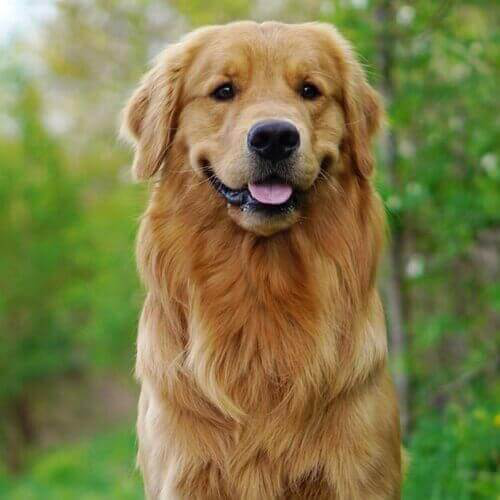

In [56]:
from PIL import Image
img = Image.open("gr.png")
img

In [57]:
img_t = preprocess(img)

In [58]:
import torch
batch_t = torch.unsqueeze(img_t, 0)
resnet.eval()
out = resnet(batch_t)
out

tensor([[-8.2891e-01, -7.8357e-01, -2.9860e+00, -3.4049e+00, -3.0556e+00,
         -1.2719e+00, -3.3907e+00, -1.7927e+00,  2.2377e-01, -2.6978e+00,
          6.4357e-01,  1.5631e-01,  1.9291e-01, -1.5347e+00,  3.8631e-01,
         -1.0977e+00, -6.4956e-01, -2.5991e-01, -9.7053e-01,  9.0956e-02,
         -1.9603e+00, -3.7630e-01, -2.1572e+00,  3.5751e-01, -2.1239e-02,
          1.0356e+00,  4.4696e-01,  4.8430e-01,  1.3752e+00, -4.7914e-01,
         -7.5175e-01, -7.4134e-01,  2.6826e-01, -1.5529e+00, -1.8305e+00,
         -3.8923e-01,  2.4952e-01, -5.5274e-01, -1.3562e-01, -1.3913e+00,
          2.0746e-01, -7.9245e-02,  2.2260e-01, -1.0592e+00,  1.7971e-01,
         -1.8053e+00,  3.4596e-01,  1.7678e-01, -2.1190e+00, -1.1729e+00,
         -1.6932e+00, -1.9053e+00,  2.1006e+00,  1.2716e+00,  1.1145e-01,
          7.0037e-01, -5.7496e-01,  7.8172e-01, -3.5571e-01,  1.8708e+00,
          1.9471e+00, -2.2975e-01,  1.3632e+00,  5.7503e-01,  2.9895e-02,
         -8.8913e-01,  6.6383e-01,  7.

In [60]:
with open('imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]
_, index = torch.max(out, 1)

percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], percentage[index[0]].item()

('golden retriever', 89.83273315429688)

##### CNN using SVM as Final Layer

In [61]:
from tensorflow.compat.v1 import ConfigProto
from tensorflow.compat.v1 import InteractiveSession

config = ConfigProto()
config.gpu_options.per_process_gpu_memory_fraction = 0.5
config.gpu_options.allow_growth = True
session = InteractiveSession(config=config)

In [62]:
# Convolutional Neural Network

# Importing the libraries
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [63]:
# Part 1 - Data Preprocessing

# Preprocessing the Training set
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [71]:
training_set = train_datagen.flow_from_directory('C:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings\\DogandCat\\train',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

# Preprocessing the Test set
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('C:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings\\DogandCat\\test',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 8005 images belonging to 2 classes.
Found 2023 images belonging to 2 classes.


In [72]:
from tensorflow.keras.layers import Conv2D
from tensorflow.keras.layers import Dense

In [73]:
from tensorflow.keras.regularizers import l2

In [74]:
# Part 2 - Building the CNN
# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Step 1 - Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32,padding="same",kernel_size=3, activation='relu', strides=2, input_shape=[64, 64, 3]))

# Step 2 - Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Adding a second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32,padding='same',kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Step 3 - Flattening
cnn.add(tf.keras.layers.Flatten())

# Step 4 - Full Connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Step 5 - Output Layer
#cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))
## For Binary Classification
cnn.add(Dense(1, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='linear'))

In [75]:
## for mulitclassification
cnn.add(Dense(4, kernel_regularizer=tf.keras.regularizers.l2(0.01),activation
             ='softmax'))
cnn.compile(optimizer = 'adam', loss = 'squared_hinge', metrics = ['accuracy'])

In [76]:
cnn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 32, 32, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 32)        9248      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 8, 8, 32)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 2048)              0         
                                                                 
 dense_2 (Dense)             (None, 128)              

In [77]:
# Part 3 - Training the CNN

# Compiling the CNN
cnn.compile(optimizer = 'adam', loss = 'hinge', metrics = ['accuracy'])

# Training the CNN on the Training set and evaluating it on the Test set
r=cnn.fit(x = training_set, validation_data = test_set, epochs = 15)

Epoch 1/15
251/251 [==============================] - 94s 370ms/step - loss: 1.0155 - accuracy: 0.2144 - val_loss: 1.0076 - val_accuracy: 0.2773
Epoch 2/15
251/251 [==============================] - 40s 157ms/step - loss: 1.0054 - accuracy: 0.4115 - val_loss: 1.0038 - val_accuracy: 0.4676
Epoch 3/15
251/251 [==============================] - 34s 133ms/step - loss: 1.0027 - accuracy: 0.4878 - val_loss: 1.0018 - val_accuracy: 0.4998
Epoch 4/15
251/251 [==============================] - 37s 149ms/step - loss: 1.0012 - accuracy: 0.4997 - val_loss: 1.0008 - val_accuracy: 0.4998
Epoch 5/15
251/251 [==============================] - 51s 203ms/step - loss: 1.0004 - accuracy: 0.4997 - val_loss: 1.0002 - val_accuracy: 0.4998
Epoch 6/15
251/251 [==============================] - 46s 182ms/step - loss: 1.0001 - accuracy: 0.4997 - val_loss: 1.0000 - val_accuracy: 0.4998
Epoch 7/15
251/251 [==============================] - 40s 158ms/step - loss: 0.9999 - accuracy: 0.4997 - val_loss: 0.9999 - val_ac

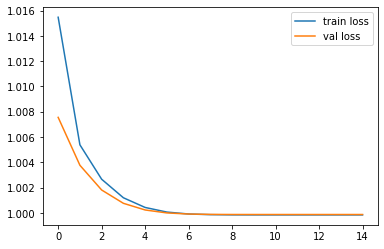

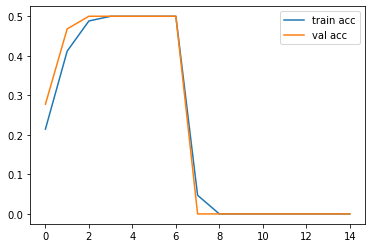

<Figure size 432x288 with 0 Axes>

In [78]:
# plot the loss
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [79]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings\\DogandCat\\test\\cats\\cat.4017.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 292ms/step


In [82]:
result[0]

array([0.24999978, 0.2500001 , 0.25      , 0.25000015], dtype=float32)

In [85]:
# Part 4 - Making a single prediction

import numpy as np
from tensorflow.keras.preprocessing import image
test_image = image.load_img('C:\\Users\\DELL\\OneDrive\\Documents\\ML_Project\\NN_Learnings\\DogandCat\\test\\dogs\\dog.4015.jpg', target_size = (64,64))
test_image = image.img_to_array(test_image)
test_image=test_image/255
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)

1/1 [==============================] - 0s 32ms/step


In [86]:
result[0]

array([0.24999978, 0.2500001 , 0.25      , 0.25000015], dtype=float32)